In [15]:
import pandas as pd
import numpy as np

data = pd.read_csv('worldcities.csv')

# Filter cities dataset for Russia
russian_cities = data[data['country'] == 'Russia']

# Extract latitude and longitude coordinates
coordinates = russian_cities[['lat', 'lng']].values

russian_cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
17,Moscow,Moscow,55.7558,37.6178,Russia,RU,RUS,Moskva,primary,17332000.0,1643318494
123,Saint Petersburg,Saint Petersburg,59.9500,30.3167,Russia,RU,RUS,Sankt-Peterburg,admin,5384342.0,1643616350
487,Novosibirsk,Novosibirsk,55.0333,82.9167,Russia,RU,RUS,Novosibirskaya Oblast’,admin,1625631.0,1643399240
536,Yekaterinburg,Yekaterinburg,56.8356,60.6128,Russia,RU,RUS,Sverdlovskaya Oblast’,admin,1468833.0,1643582706
606,Nizhniy Novgorod,Nizhniy Novgorod,56.3269,44.0075,Russia,RU,RUS,Nizhegorodskaya Oblast’,admin,1264075.0,1643012126
...,...,...,...,...,...,...,...,...,...,...,...
44683,Zemlya Bunge,Zemlya Bunge,74.8983,142.1050,Russia,RU,RUS,Sakha (Yakutiya),NaN,10.0,1643720805
44684,Agapa,Agapa,71.4504,89.2500,Russia,RU,RUS,Krasnoyarskiy Kray,NaN,10.0,1643009087
44685,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006


In [16]:
import numpy as np
import pandas as pd
import random
import math

# Calculate distance matrix
num_cities = len(coordinates)
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        distances[i, j] = np.sqrt((coordinates[i, 0] - coordinates[j, 0])**2 + (coordinates[i, 1] - coordinates[j, 1])**2)

# Simulated Annealing
def total_distance(order):
    return sum(distances[order[i-1], order[i]] for i in range(num_cities))

def simulated_annealing(init_temp, cooling_rate):
    current_order = list(range(num_cities))
    current_distance = total_distance(current_order)
    best_order = list(current_order)
    best_distance = current_distance
    temp = init_temp

    while temp > 1:
        new_order = list(current_order)
        i, j = random.sample(range(num_cities), 2)
        new_order[i], new_order[j] = new_order[j], new_order[i]
        new_distance = total_distance(new_order)
        if math.exp((current_distance - new_distance) / temp) > random.random():
            current_order = new_order
            current_distance = new_distance
            if current_distance < best_distance:
                best_order = list(current_order)
                best_distance = current_distance
        temp *= cooling_rate

    return best_order, best_distance

# Run Simulated Annealing
best_order, best_distance = simulated_annealing(init_temp=100, cooling_rate=0.999)
print("Best order:", best_order)
print("Best distance:", best_distance)


Best order: [1127, 1068, 678, 685, 854, 768, 1181, 417, 617, 179, 331, 1111, 215, 41, 738, 115, 875, 1007, 946, 537, 147, 213, 453, 107, 972, 1062, 137, 732, 13, 991, 697, 574, 862, 654, 978, 646, 686, 264, 674, 80, 458, 891, 927, 438, 592, 127, 38, 327, 368, 426, 253, 591, 449, 15, 655, 648, 621, 709, 195, 565, 933, 588, 62, 1210, 470, 372, 437, 897, 232, 455, 783, 103, 1134, 348, 858, 805, 597, 902, 729, 1049, 398, 584, 296, 653, 689, 252, 988, 630, 391, 1101, 525, 514, 199, 546, 315, 1069, 412, 97, 88, 779, 358, 371, 1088, 90, 740, 1094, 773, 981, 51, 174, 440, 111, 1168, 964, 596, 425, 230, 262, 328, 376, 387, 615, 44, 192, 803, 737, 369, 1079, 1025, 1051, 481, 131, 342, 183, 134, 556, 320, 641, 355, 1010, 1022, 660, 549, 24, 992, 471, 985, 45, 937, 251, 101, 1166, 656, 119, 17, 267, 553, 310, 434, 1089, 935, 636, 767, 445, 370, 289, 635, 246, 322, 651, 181, 696, 657, 728, 1055, 47, 390, 352, 463, 128, 999, 235, 339, 33, 184, 954, 922, 351, 291, 545, 921, 292, 459, 1132, 100, 81, 1

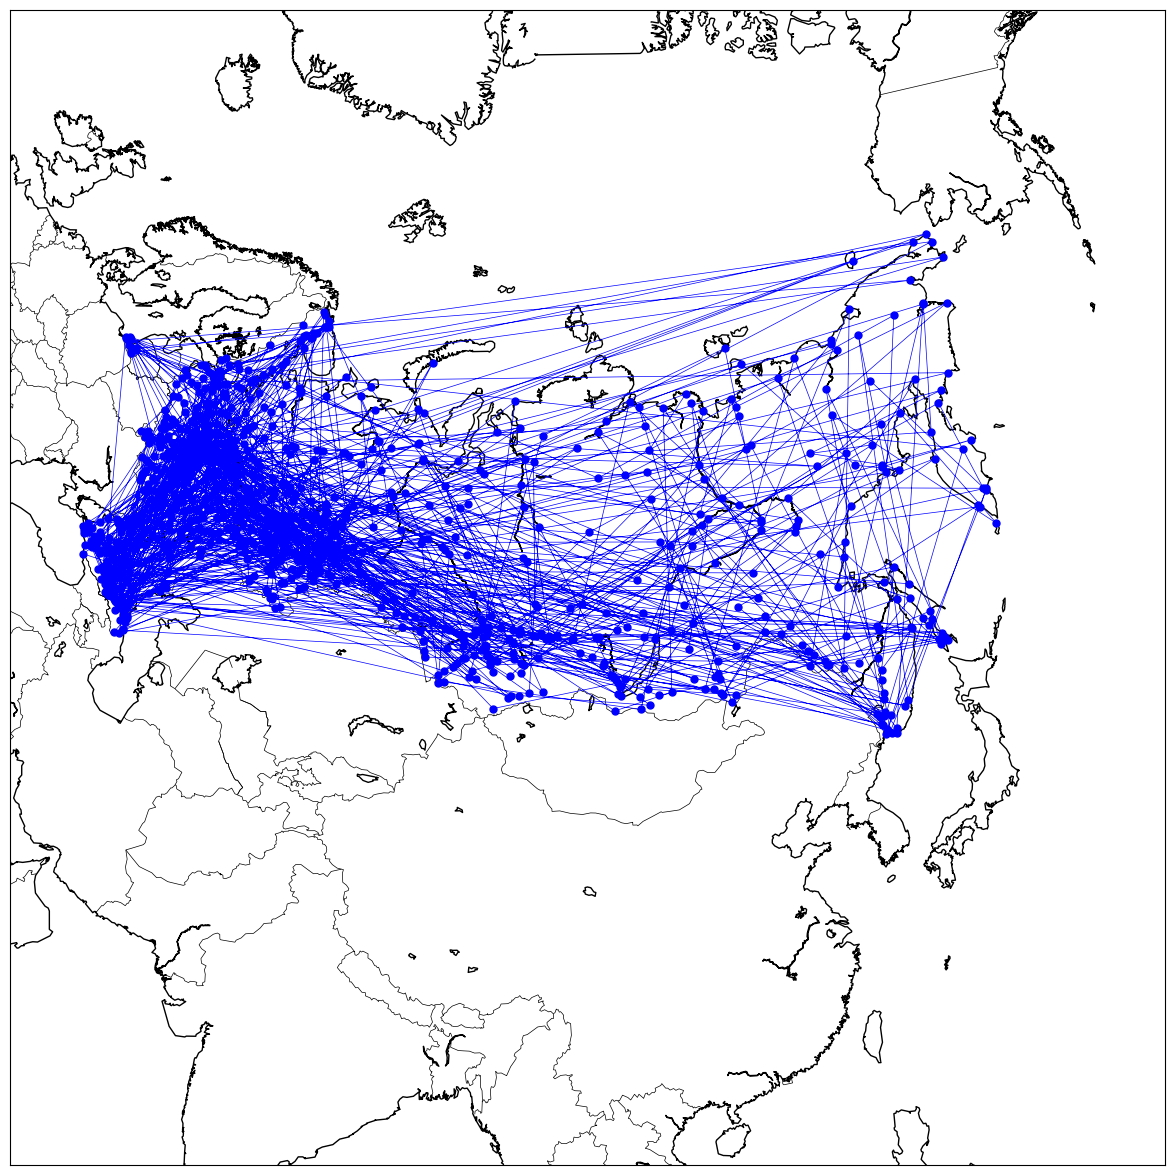

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data
data = pd.read_csv('worldcities.csv')
russian_cities = data[data['country'] == 'Russia']
coordinates = russian_cities[['lat', 'lng']].values

# Increase the figure size
plt.figure(figsize=(15,15))

# Create a map centered around the middle of Russia
m = Basemap(projection='lcc', resolution='l',
            width=1E7, height=1E7, 
            lat_0=60, lon_0=100)

# Draw the coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Get the coordinates for the best order
best_coordinates = coordinates[best_order]

# Convert latitude and longitude to map projection coordinates
x, y = m(best_coordinates[:, 1], best_coordinates[:, 0])

# Plot the cities
m.scatter(x, y, 10, marker='o', color='Red')

# Plot the route with a smaller linewidth
m.plot(x, y, 'o-', markersize=5, linewidth=0.5, color='Blue')

plt.show()
